# Part 1: Plot $\phi$ Got from Different Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_table('phi_Daniel',skiprows=3,delim_whitespace=True,names=['Time','phi_PLUMED'])
data2 = pd.read_table('phi2_Daniel',skiprows=1,delim_whitespace=True,names=['Time','phi_math'])
data_vmd = pd.read_table('phi_vmd',skiprows=1,delim_whitespace=True,names=['Time','phi_vmd'])
data_gmx = pd.read_table('phiALA2.xvg',skiprows=16,delim_whitespace=True,names=['Time','phi_gmx'])
data_vmd['rad'] = data_vmd.phi_vmd*math.pi/180
data['phi_matheval'] = data2.phi_math
data['phi_vmd'] = data_vmd.rad
data['phi_gmx'] = data_gmx.phi_gmx

In [3]:
data.head(10)

,Time,phi_PLUMED,phi_matheval,phi_vmd,phi_gmx
0,0.0,-2.191770,-2.191770,-2.191771,-2.19177
1,1.0,-2.186651,-2.186651,-2.186652,-2.18665
2,2.0,-1.974565,-1.974565,-1.974566,-1.97457
3,3.0,-1.681557,-1.681557,-1.681558,-1.68156
4,4.0,-1.192691,-1.192691,-1.192691,-1.19269
5,5.0,-1.452395,-1.452395,-1.452396,-1.45240
6,6.0,-1.403801,-1.403801,-1.403801,-1.40380
7,7.0,-1.671706,-1.671706,-1.671706,-1.67171
8,8.0,-1.925363,-1.925363,-1.925364,-1.92536
9,9.0,-2.421421,-2.421421,-2.421422,-2.42142


In [4]:
# Check my matheval calculation gets the same result as PLUMED in [-Pi,Pi]
n = 0
for i in range(data.shape[0]):
    if data.loc[i]['phi_PLUMED'] != data.loc[i]['phi_matheval']:
        n += 1
if n != 0:
    print(n)
    print('Come on...')
else:
    print('You Got It!')

You Got It!


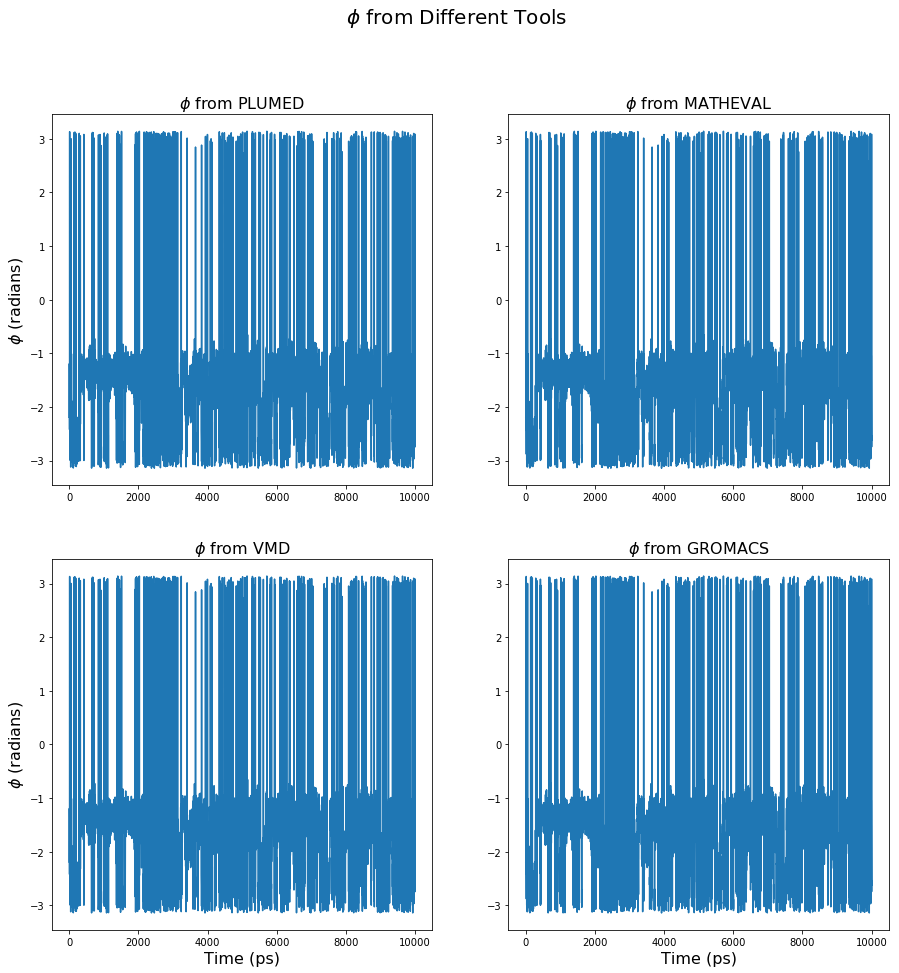

In [5]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.plot(data.Time,data.phi_PLUMED)
plt.title('$\phi$ from PLUMED',fontsize = 16)
plt.ylabel('$\phi$ (radians)',fontsize=16)

plt.subplot(222)
plt.plot(data.Time,data.phi_matheval)
plt.title('$\phi$ from MATHEVAL',fontsize = 16)

plt.subplot(223)
plt.plot(data.Time,data.phi_vmd)
plt.title('$\phi$ from VMD',fontsize = 16)
plt.xlabel('Time (ps)',fontsize = 16)
plt.ylabel('$\phi$ (radians)',fontsize=16)

plt.subplot(224)
plt.plot(data.Time,data.phi_gmx)
plt.title('$\phi$ from GROMACS',fontsize = 16)
plt.xlabel('Time (ps)',fontsize = 16)

plt.suptitle('$\phi$ from Different Tools',fontsize = 20)

In [6]:
###My MATHEVAL calculation in [-pi,pi]:
"""
DISTANCE LABEL=avec ATOMS=5,7 COMPONENTS
DISTANCE LABEL=bvec ATOMS=7,9 COMPONENTS
DISTANCE LABEL=cvec ATOMS=9,15 COMPONENTS

n1x: MATHEVAL ARG=avec.y,avec.z,bvec.y,bvec.z VAR=ay,az,by,bz FUNC=ay*bz-az*by PERIODIC=NO
n1y: MATHEVAL ARG=avec.x,avec.z,bvec.x,bvec.z VAR=ax,az,bx,bz FUNC=-(ax*bz-az*bx) PERIODIC=NO
n1z: MATHEVAL ARG=avec.x,avec.y,bvec.x,bvec.y VAR=ax,ay,bx,by FUNC=ax*by-ay*bx PERIODIC=NO
n2x: MATHEVAL ARG=bvec.y,bvec.z,cvec.y,cvec.z VAR=by,bz,cy,cz FUNC=by*cz-bz*cy PERIODIC=NO
n2y: MATHEVAL ARG=bvec.x,bvec.z,cvec.x,cvec.z VAR=bx,bz,cx,cz FUNC=-(bx*cz-bz*cx) PERIODIC=NO
n2z: MATHEVAL ARG=bvec.x,bvec.y,cvec.x,cvec.y VAR=bx,by,cx,cy FUNC=bx*cy-by*cx PERIODIC=NO

m: MATHEVAL ARG=avec.x,avec.y,avec.z,n2x,n2y,n2z VAR=ax,ay,az,nx,ny,nz FUNC=ax*nx+ay*ny+az*nz PERIODIC=NO

MATHEVAL ...
LABEL=absphi
ARG=n1x,n1y,n1z,n2x,n2y,n2z
VAR=nax,nay,naz,nbx,nby,nbz
FUNC=acos((nax*nbx+nay*nby+naz*nbz)/sqrt((nax*nax+nay*nay+naz*naz)*(nbx*nbx+nby*nby+nbz*nbz)))
PERIODIC=NO
... MATHEVAL

MATHEVAL ...
LABEL=phi
ARG=m,absphi
FUNC=(step(x-0)-step(0-x))*y
PERIODIC=NO
... MATHEVAL
"""
print()

# Part 2: Well-Tempered Metadynamics: A Smoothly Converging and Tunable Free-Energy Method
### 1. How does this differ to standard MetaD?
* Replacing $\delta$ with a finite width Gaussian, well-temperedcan MetaD can easily be implemented in any metadynamics code by rescaling the height of the Gaussians.

### 2. What are its advantages/disadvantages compared to standard MetaD?
#### Advantages:
* Obtain an estimate of the FES that converges to the exact result in the long time limit.
* Offer the possibility of controlling the reions of FES that are physically meaningful to explore.
* Provide a unified framework whose limiting cases are standard MetaD and nonbiased standard sampling.

#### Disadvantages:
* If $\tau_B$(time scale for the bias evolution) is too small relative to the time necessary to properly average out the transverse degrees of freedom, the large fluctuations in the initial FES reconstruction need a longer time to be recovered.

### 3. Is this implemented in PLUMED?
* Yes.